In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read data and scale the feature data using standardscaler

scaler=StandardScaler()

train_data=pd.read_csv('train_data.csv',header=0,sep=',',index_col=0)
validation_data=pd.read_csv('validation_data.csv',header=0,sep=',',index_col=0)
train_validation_data=pd.read_csv('train_validation_data.csv',header=0,sep=',',index_col=0)
test_data=pd.read_csv('test_data.csv',header=0,sep=',',index_col=0)

x_train=train_data.drop('shares',axis=1)
x_train_array=scaler.fit_transform(x_train)
x_train_scale=pd.DataFrame(x_train_array,index=x_train.index,columns=x_train.columns)
y_train=train_data['shares']

x_validation=validation_data.drop('shares',axis=1)
x_validation_array=scaler.fit_transform(x_validation)
x_validation_scale=pd.DataFrame(x_validation_array,index=x_validation.index,columns=x_validation.columns)
y_validation=validation_data['shares']

x_train_validation=train_validation_data.drop('shares',axis=1)
x_train_validation_array=scaler.fit_transform(x_train_validation)
x_train_validation_scale=pd.DataFrame(x_train_validation_array,index=x_train_validation.index,columns=x_train_validation.columns)
y_train_validation=train_validation_data['shares']

x_test=test_data.drop('shares',axis=1)
x_test_array=scaler.fit_transform(x_test)
x_test_scale=pd.DataFrame(x_test_array,index=x_test.index,columns=x_test.columns)
y_test=test_data['shares']

In [4]:
# Build the logistic regression classifier function

def LR(p,c):
    lr=LogisticRegression(penalty=p,C=c)
    lr.fit(x_train,y_train)
    
    #auc score
    lr_auc=roc_auc_score(y_validation,lr.predict_proba(x_validation)[:,1])
    
    #tpr
    lr_true_positive=confusion_matrix(y_validation,lr.predict(x_validation))[1][1]
    lr_false_negative=confusion_matrix(y_validation,lr.predict(x_validation))[1][0]
    lr_true_positive_rate=lr_true_positive/(lr_true_positive+lr_false_negative)
    
    return lr_auc,lr_true_positive_rate

In [5]:
# Convert all auc_score and tpr to a dataframe

dict_lr={'penalty':[],'C':[],'auc_score':[],'tpr':[]}

p_list=['l1','l2']
c_list=[10**e for e in range(-6,2)]

for p in p_list:
    for c in c_list:
        auc_score,tpr=LR(p,c)
            
        dict_lr['penalty'].append(p)
        dict_lr['C'].append(c)
        dict_lr['auc_score'].append(auc_score)
        dict_lr['tpr'].append(tpr)

df_lr=pd.DataFrame(dict_lr)

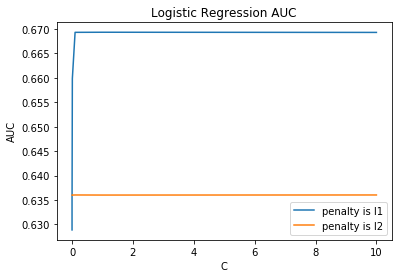

In [7]:
# draw plots for auc and tpr based on hyperparameter choices

for p in p_list:
    plt.plot(c_list,df_lr[df_lr['penalty']==p]['auc_score'],label='penalty is '+str(p))

plt.title('Logistic Regression AUC')
plt.xlabel('C')
plt.ylabel('AUC')
plt.legend()

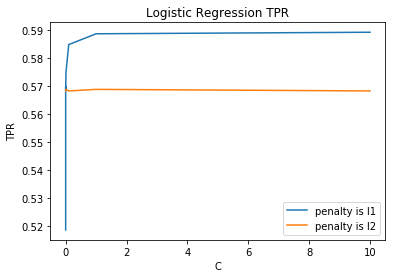

In [8]:
for p in p_list:
    plt.plot(c_list,df_lr[df_lr['penalty']==p]['tpr'],label='penalty is '+str(p))

plt.title('Logistic Regression TPR')
plt.xlabel('C')
plt.ylabel('TPR')
plt.legend()

In [9]:
# Find the best hyperparameter for the best auc

p1=df_lr[df_lr['auc_score']==df_lr['auc_score'].max()]['penalty'].item()
c1=df_lr[df_lr['auc_score']==df_lr['auc_score'].max()]['C'].item()
print('best auc based penalty is '+p1)
print('best auc based C= '+str(c1))

best auc based penalty is l1
best auc based C= 1.0


best auc based auc is 0.6764600068713352
best auc based tpr is 0.5815815815815816


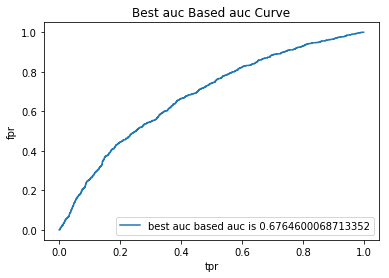

In [10]:
# Fit again in train_validation_data and test in test data

lr1=LogisticRegression(penalty=p1,C=c1)
lr1.fit(x_train_validation,y_train_validation)

lr1_tpr,lr1_fpr,_=roc_curve(y_test,lr1.predict_proba(x_test)[:,1])
lr1_auc=roc_auc_score(y_test,lr1.predict_proba(x_test)[:,1])
plt.plot(lr1_tpr,lr1_fpr,label='best auc based auc is '+str(lr1_auc))
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.title('Best auc Based auc Curve')
plt.legend()

lr1_true_positive=confusion_matrix(y_test,lr1.predict(x_test))[1][1]
lr1_false_negative=confusion_matrix(y_test,lr1.predict(x_test))[1][0]
lr1_true_positive_rate=lr1_true_positive/(lr1_true_positive+lr1_false_negative)

print('best auc based auc is '+str(lr1_auc))
print('best auc based tpr is '+str(lr1_true_positive_rate))

In [12]:
# Find the best hyperparameter for the best tpr

p2=df_lr[df_lr['tpr']==df_lr['tpr'].max()]['penalty'].iloc[0]
c2=df_lr[df_lr['tpr']==df_lr['tpr'].max()]['C'].iloc[0]
print('best auc based penalty is '+p2)
print('best auc based C= '+str(c2))

best auc based penalty is l1
best auc based C= 10.0


best tpr based auc is 0.6763206227130704
best tpr based tpr is 0.5815815815815816


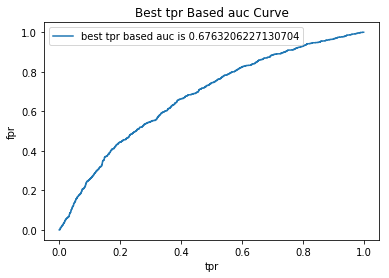

In [13]:
# Fit again in train_validation_data and test in test data

lr2=LogisticRegression(penalty=p2,C=c2)
lr2.fit(x_train_validation,y_train_validation)

lr2_tpr,lr2_fpr,_=roc_curve(y_test,lr2.predict_proba(x_test)[:,1])
lr2_auc=roc_auc_score(y_test,lr2.predict_proba(x_test)[:,1])
plt.plot(lr2_tpr,lr2_fpr,label='best tpr based auc is '+str(lr2_auc))
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.title('Best tpr Based auc Curve')
plt.legend()

lr2_true_positive=confusion_matrix(y_test,lr2.predict(x_test))[1][1]
lr2_false_negative=confusion_matrix(y_test,lr2.predict(x_test))[1][0]
lr2_true_positive_rate=lr1_true_positive/(lr2_true_positive+lr2_false_negative)

print('best tpr based auc is '+str(lr2_auc))
print('best tpr based tpr is '+str(lr2_true_positive_rate))